In [1]:
import os
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

2023-05-30 15:37:40.923406: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-30 15:37:41.356642: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-30 15:37:41.358701: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-30 15:37:43.343772: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
current_dir = os.getcwd()  # Get the current directory
input_dir = os.path.join(current_dir, 'pics')  # Directory where the data is stored


The following code must be run through new batches of images

In [3]:

# Load the trained model
model = load_model('classification_model.h5')


In [4]:
# Create directories for saving images
if not os.path.exists(os.path.join(current_dir, 'trees')):
    os.makedirs(os.path.join(current_dir, 'trees'))
if not os.path.exists(os.path.join(current_dir, 'plastic')):
    os.makedirs(os.path.join(current_dir, 'plastic'))


1/1 [==============================] - 0s 59ms/step


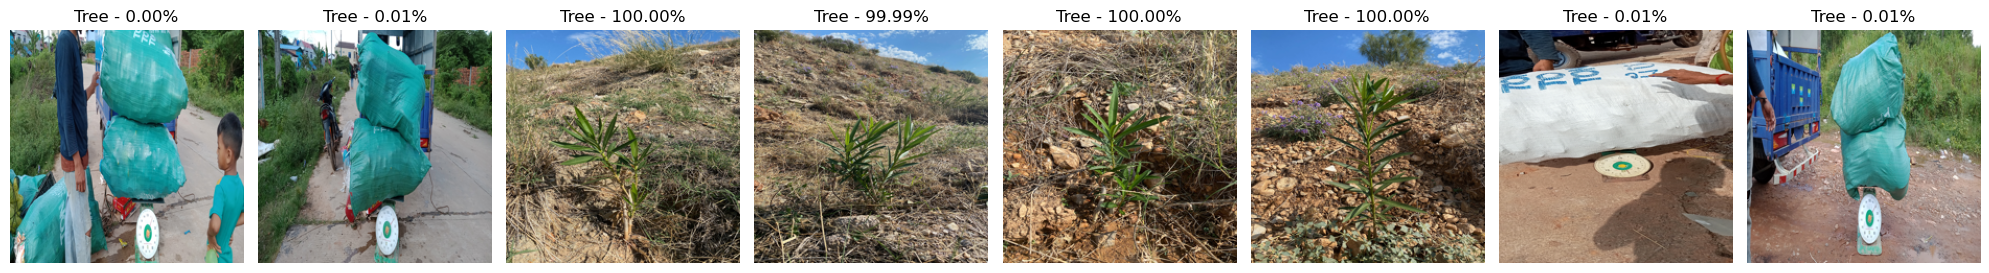

In [5]:
# Function to display new images with their predicted probabilities
def display_new_images_with_probabilities(images, base_dir):
    fig, axes = plt.subplots(1, len(images), figsize=(20, 4))
    for idx, image_file in enumerate(images):
        img_path = os.path.join(base_dir, image_file)
        img = Image.open(img_path)
        img = img.resize((224, 224)) # Resize image to match model's expected input
        img_array = np.array(img) / 255.0 # Model was trained on images scaled to [0,1]
        img_array = np.expand_dims(img_array, axis=0) # Model expects batches of images
        
        prediction = model.predict(img_array)[0][0]
        prediction_percentage = (1 - prediction) * 100 # Since all images are 'trees'
        
        axes[idx].imshow(img)
        axes[idx].set_title(f"Tree - {prediction_percentage:.2f}%")
        axes[idx].axis('off')

        # Save the image in the corresponding folder based on the predicted class
        if prediction < 0.5:  # The threshold can be adjusted based on your needs
            img.save(os.path.join(current_dir, 'trees', image_file))
        else:
            img.save(os.path.join(current_dir, 'plastic', image_file))
        
    plt.tight_layout()
    plt.show()

# Get all image files from the 'pics' directory
sample_pics = os.listdir(input_dir)

# Display new images with their predicted probabilities
display_new_images_with_probabilities(sample_pics, input_dir)

In [1]:

import json

# After classification:
image_certainties = {img: predict_image_class(os.path.join('static/images', img)) for img in image_files}

# Save to file:
with open('image_certainties.json', 'w') as f:
    json.dump(image_certainties, f)


NameError: name 'image_files' is not defined